In [35]:
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [49]:
X_train, y_train = data[0]
X_test, y_test = data[1]

In [50]:
Image.fromarray(X_train[1]), Image.fromarray(X_train[2]), 

(<PIL.Image.Image image mode=L size=28x28 at 0x7F9E60C9C710>,
 <PIL.Image.Image image mode=L size=28x28 at 0x7F9E60C9C828>)

(-0.5, 27.5, 27.5, -0.5)

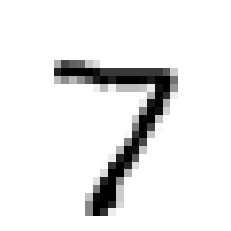

In [163]:
plt.imshow(X_test[0], cmap='gray_r', vmin=0, vmax=255)
plt.axis('off')

In [52]:
image_count_train = len(y_train)

In [53]:
BATCH_SIZE = 32
IMG_HEIGHT = 28
IMG_WIDTH = 28
STEPS_PER_EPOCH = np.ceil(image_count_train/BATCH_SIZE)

In [54]:
X_train[0].shape

(28, 28)

In [55]:
X_train_s = X_train / 255.
X_test_s = X_test / 255.

### CNN

In [143]:
img_inputs = tf.keras.Input(shape=(28,28,1), batch_size=BATCH_SIZE)

In [144]:
img_inputs.get_shape()

TensorShape([32, 28, 28, 1])

In [145]:
from tensorflow.keras import layers

In [146]:
x = layers.Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1),
                  activation="relu")(img_inputs)
x = layers.MaxPool2D(pool_size=(2,2))(x)

x = layers.Conv2D(filters=32, kernel_size=(2,2),
                 activation="relu")(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

x = layers.Flatten()(x)
outputs = layers.Dense(units=10, activation="softmax")(x)

model = tf.keras.Model(inputs=img_inputs, outputs=outputs, name='mnist_model')

In [141]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(32, 28, 28, 1)]         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (32, 25, 25, 32)          544       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (32, 12, 12, 32)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (32, 11, 11, 32)          4128      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (32, 5, 5, 32)            0         
_________________________________________________________________
flatten_9 (Flatten)          (32, 800)                 0         
_________________________________________________________________
dense_15 (Dense)             (32, 10)                  

In [150]:
X = np.expand_dims(X_train_s,-1)

In [152]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])
history = model.fit(X, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=5,
                   validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 13s 267us/sample - loss: 0.0835 - accuracy: 0.9746 - val_loss: 0.0637 - val_accuracy: 0.9812
Epoch 2/5
48000/48000 [==============================] - 14s 296us/sample - loss: 0.0611 - accuracy: 0.9812 - val_loss: 0.0665 - val_accuracy: 0.9821
Epoch 3/5
48000/48000 [==============================] - 13s 264us/sample - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0554 - val_accuracy: 0.9852
Epoch 4/5
48000/48000 [==============================] - 13s 264us/sample - loss: 0.0455 - accuracy: 0.9864 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 5/5
48000/48000 [==============================] - 13s 270us/sample - loss: 0.0409 - accuracy: 0.9880 - val_loss: 0.0546 - val_accuracy: 0.9843


In [162]:
model.predict(np.expand_dims(X_test,-1))[0].argmax()

7

In [164]:
## expand dim

In [168]:
a = np.array([1,1,1,1,1])
print(a)
a.shape

[1 1 1 1 1]


(5,)

In [170]:
a_exp = np.expand_dims(a,-1)

In [171]:
print(a_exp)

[[1]
 [1]
 [1]
 [1]
 [1]]


In [173]:
a_exp.shape

(5, 1)

In [174]:
## added a feature dimension

In [175]:
# build discriminator (fake, real); as above but just two classes --> sigmoid
# generator: samke architecture as above, but deconv